<a href="https://colab.research.google.com/github/yastiaisyah/AnalisisDataForensik/blob/main/CH7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Load dataset
url = 'https://raw.githubusercontent.com/PacktPublishing/Exploratory-Data-Analysis-with-Python-Cookbook/main/Ch7/Data/SF_Air_Traffic_Passenger_Statistics_Transformed.csv'
air_traffic_data = pd.read_csv(url)
#Inspect first 5 rows and data types of the dataset
air_traffic_data.head()

,Date,Total Passenger Count
0,200601,2448889
1,200602,2223024
2,200603,2708778
3,200604,2773293
4,200605,2829000


In [25]:
air_traffic_data.shape

(132, 2)

In [26]:
air_traffic_data.dtypes

Date                     int64
Total Passenger Count    int64
dtype: object

In [28]:
#Transform date int to date
air_traffic_data['Date']= pd.to_datetime(air_traffic_data['Date'], format = "%Y%m")
air_traffic_data.dtypes

Date                     datetime64[ns]
Total Passenger Count             int64
dtype: object

In [29]:
#Set date as index
air_traffic_data.set_index('Date',inplace = True)
air_traffic_data.shape

(132, 1)

In [30]:
#Check Stationarity
adf_result = adfuller(air_traffic_data)
adf_result

(0.7015289287377366,
 0.9898683326442054,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 3039.0876643475)

In [31]:
print('ADF Test Statistic: %f' % adf_result[0])

print('p-value: %f' % adf_result[1])

print('Critical Values:')

print(adf_result[4])

if adf_result[0] < adf_result[4]["5%"]:
    print ("Reject Null Hypothesis - Time Series is Stationary")
else:
    print ("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

ADF Test Statistic: 0.701529
p-value: 0.989868
Critical Values:
{'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
Failed to Reject Null Hypothesis - Time Series is Non-Stationary


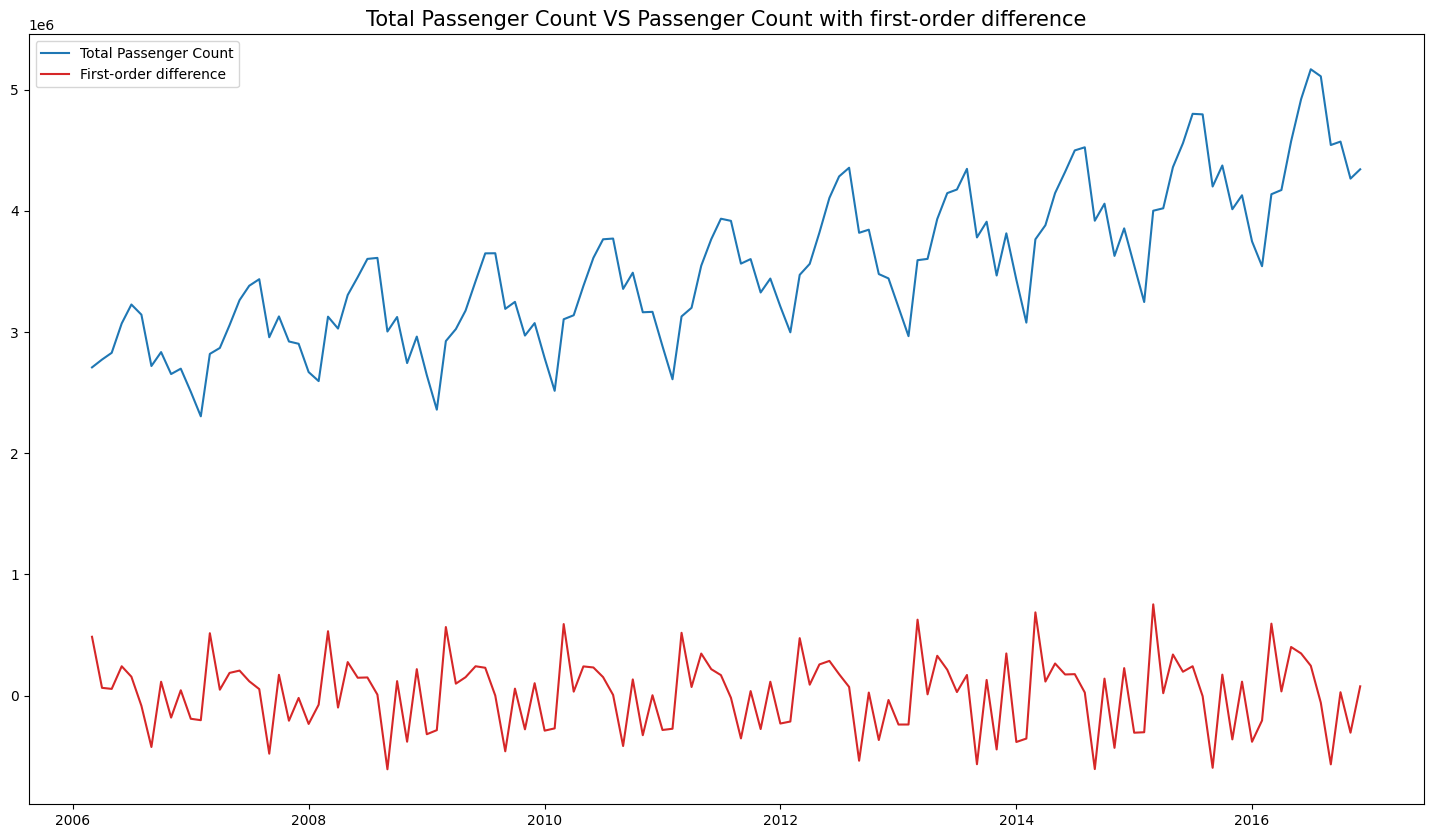

In [34]:
#Make the data stationary
air_traffic_data['Difference'] = air_traffic_data['Total Passenger Count'].diff(periods=1)
#Drop missing values
air_traffic_data = air_traffic_data.dropna()
#Plot stationary time series against original time series
plt.figure(figsize= (18,10))

plt.plot(air_traffic_data['Total Passenger Count'], label='Total Passenger Count')
plt.plot(air_traffic_data['Difference'], label='First-order difference', color='tab:red')
plt.title('Total Passenger Count VS Passenger Count with first-order difference', size=15)
plt.legend()

In [35]:
#Check Stationarity
adf_result = adfuller(air_traffic_data['Difference'], autolag='AIC')
adf_result

(-3.086893613640741,
 0.027538446930505854,
 12,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 2988.521373321964)

In [36]:
print('ADF Test Statistic: %f' % adf_result[0])

print('p-value: %f' % adf_result[1])

print('Critical Values:')

print(adf_result[4])

if adf_result[0] < adf_result[4]["5%"]:
    print ("Reject Null Hypothesis - Time Series is Stationary")
else:
    print ("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

ADF Test Statistic: -3.086894
p-value: 0.027538
Critical Values:
{'1%': -3.487517288664615, '5%': -2.8865777180380032, '10%': -2.5801239192052012}
Reject Null Hypothesis - Time Series is Stationary


In [39]:
#Compute Autocorrelation
acf_values = acf(air_traffic_data[['Total Passenger Count']],nlags = 24)
for i in range(0,25):
    print("Lag " ,i, " " , np.round(acf_values[i],2))

Lag  0   1.0
Lag  1   0.87
Lag  2   0.76
Lag  3   0.61
Lag  4   0.47
Lag  5   0.37
Lag  6   0.26
Lag  7   0.33
Lag  8   0.38
Lag  9   0.49
Lag  10   0.59
Lag  11   0.67
Lag  12   0.76
Lag  13   0.64
Lag  14   0.55
Lag  15   0.41
Lag  16   0.28
Lag  17   0.19
Lag  18   0.1
Lag  19   0.16
Lag  20   0.21
Lag  21   0.31
Lag  22   0.41
Lag  23   0.48
Lag  24   0.56


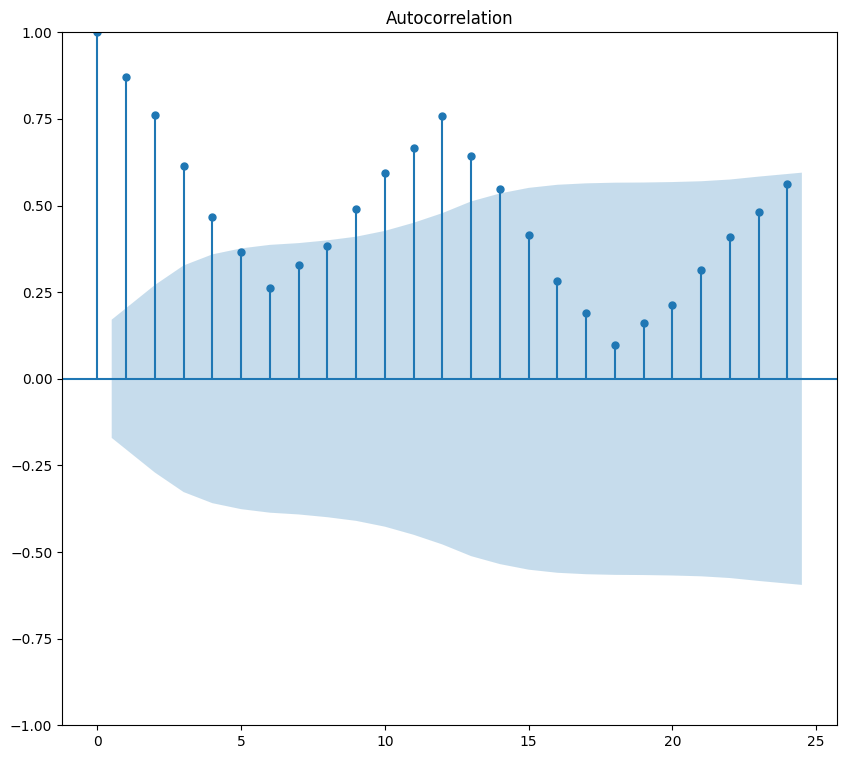

In [40]:
#Plot Autocorrelation
fig= plot_acf(air_traffic_data['Total Passenger Count'],lags = 24)
fig.set_size_inches((10, 9))
plt.show()

In [41]:
#Compute Partial Autocorrelation
pacf_values = pacf(air_traffic_data['Total Passenger Count'],nlags=24,method="ols")
for i in range(0,25):
    print("Lag " ,i, " " , np.round(pacf_values[i],2))

Lag  0   1.0
Lag  1   0.88
Lag  2   0.05
Lag  3   -0.24
Lag  4   -0.13
Lag  5   0.21
Lag  6   -0.04
Lag  7   0.75
Lag  8   0.18
Lag  9   0.4
Lag  10   0.1
Lag  11   0.44
Lag  12   0.74
Lag  13   -0.63
Lag  14   -0.19
Lag  15   -0.1
Lag  16   0.01
Lag  17   0.21
Lag  18   0.0
Lag  19   -0.03
Lag  20   0.32
Lag  21   0.06
Lag  22   0.24
Lag  23   0.09
Lag  24   0.12


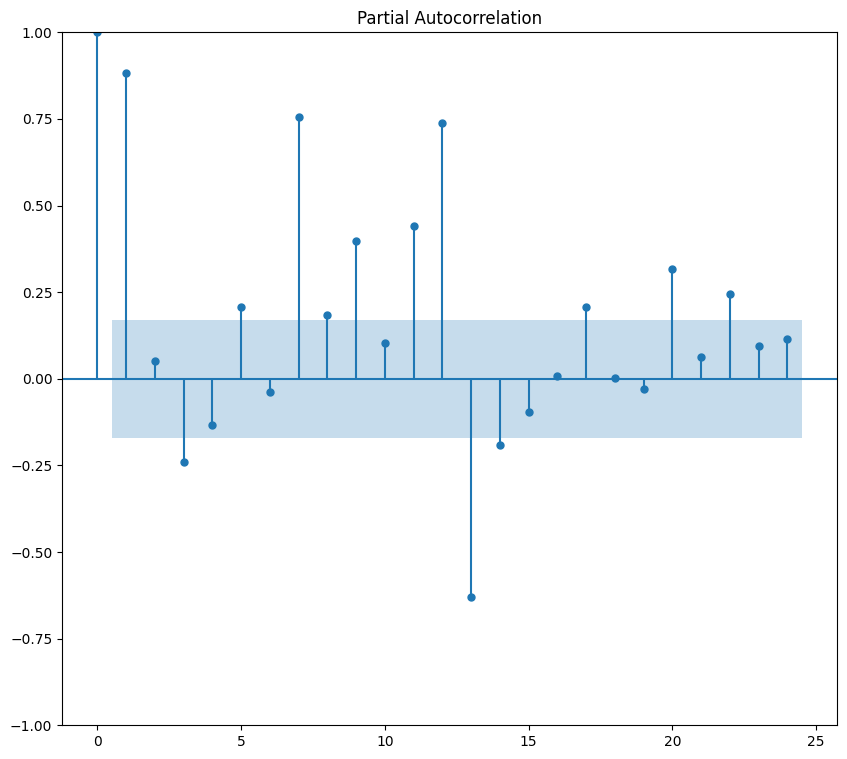

In [42]:
#Plot Partial Autocorrelation
fig = plot_pacf(air_traffic_data['Total Passenger Count'],method = 'ols', lags=24)
fig.set_size_inches((10, 9))
plt.show()

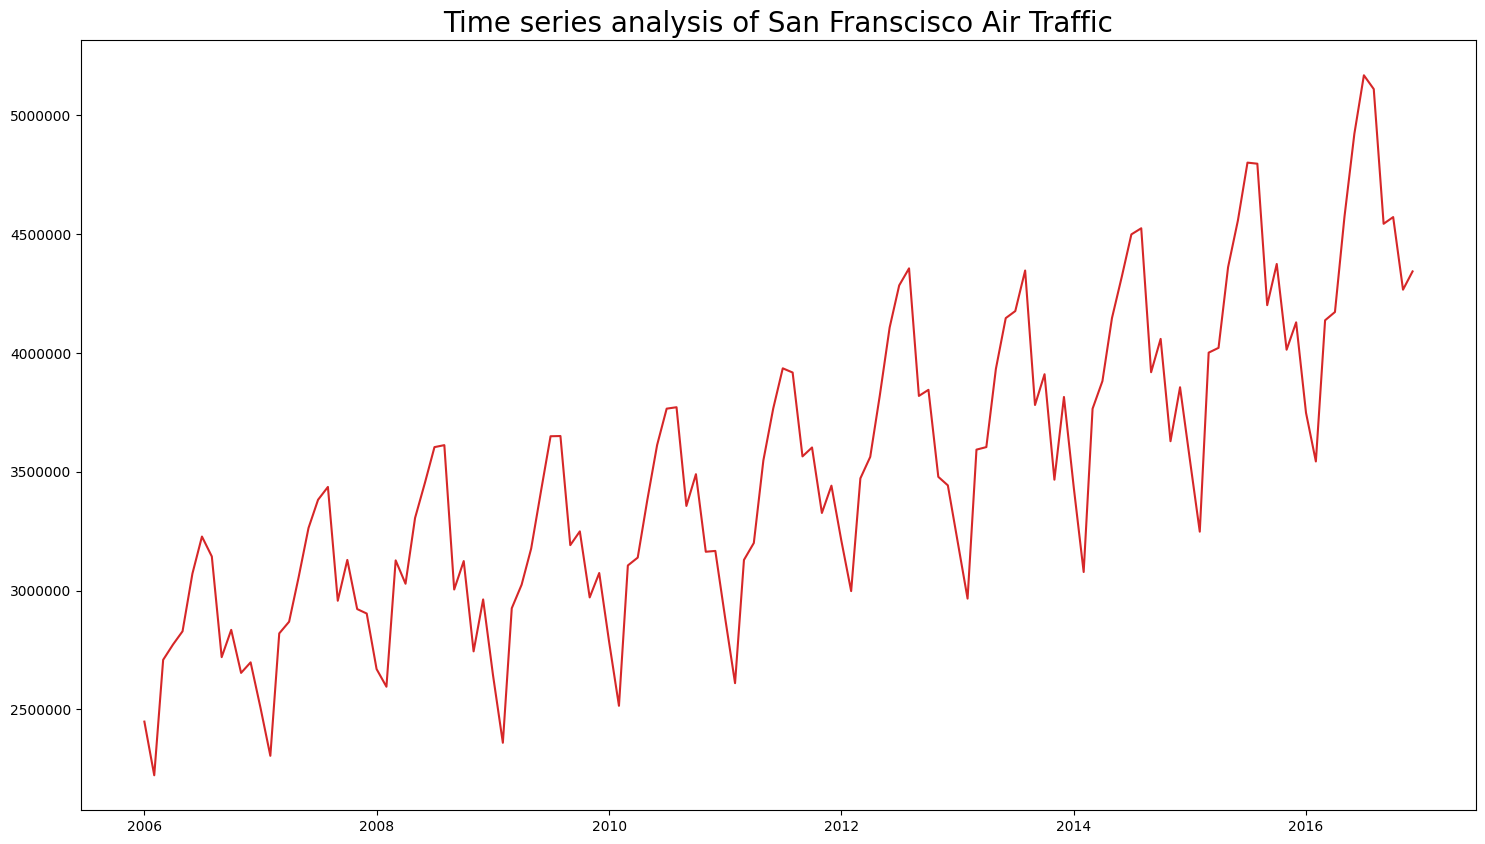

In [ ]:
#Plot time series using line plot
plt.figure(figsize= (18,10))

plt.plot(air_traffic_data.index, air_traffic_data['Total Passenger Count'], color='tab:red')
plt.title("Time series analysis of San Franscisco Air Traffic",fontsize = 20)
plt.ticklabel_format(style='plain', axis='y')

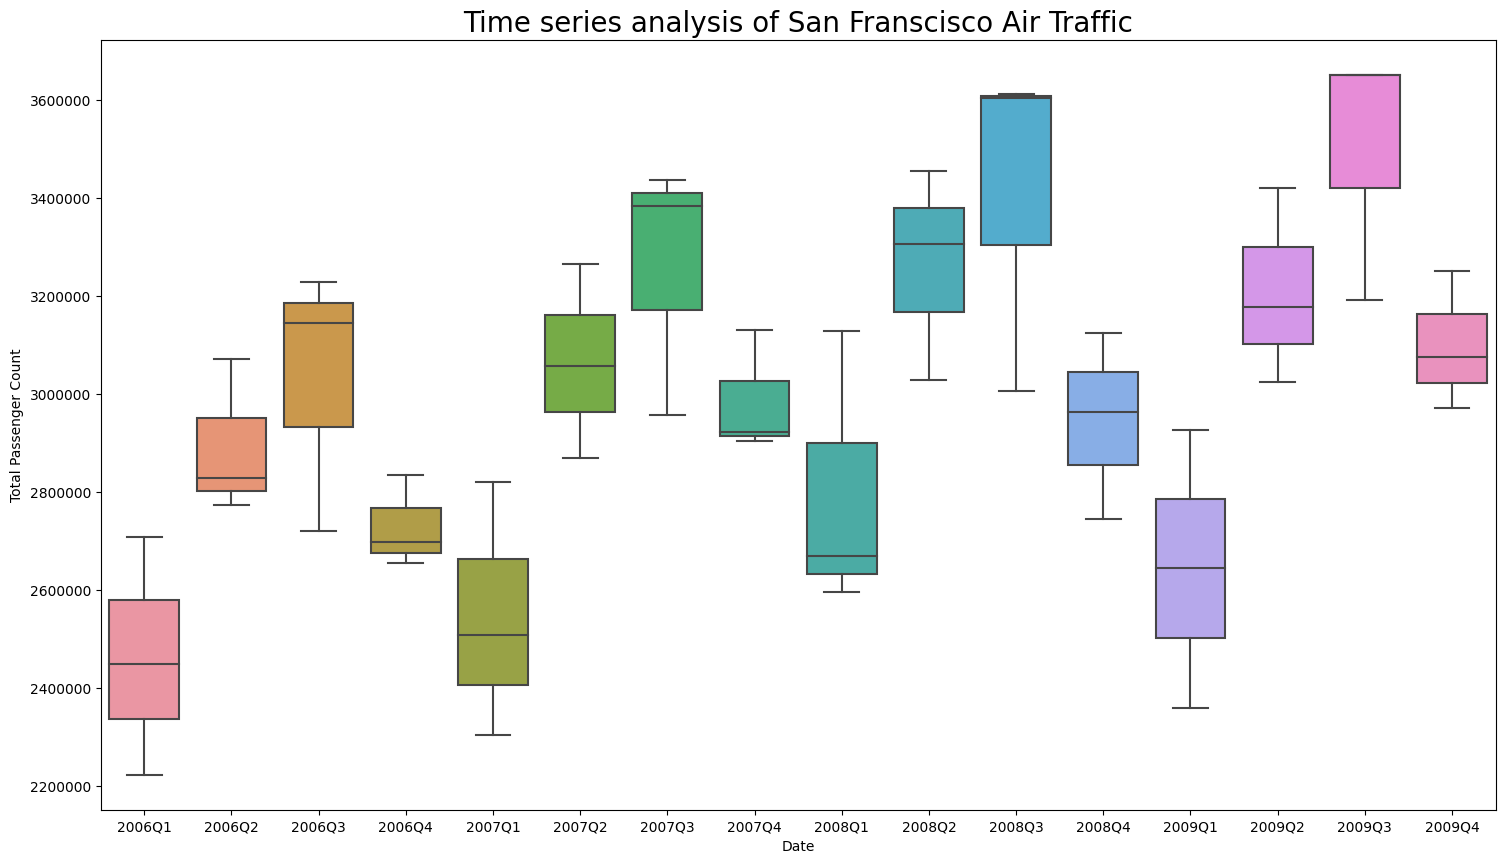

In [ ]:
#Plot time series using boxplot
plt.figure(figsize= (18,10))

data_subset = air_traffic_data[air_traffic_data.index < '2010-01-01']

ax = sns.boxplot(data = data_subset , x= pd.PeriodIndex(data_subset.index, freq='Q'),
                 y= data_subset['Total Passenger Count'])

ax.set_title("Time series analysis of San Franscisco Air Traffic",fontsize = 20)

plt.ticklabel_format(style='plain', axis='y')

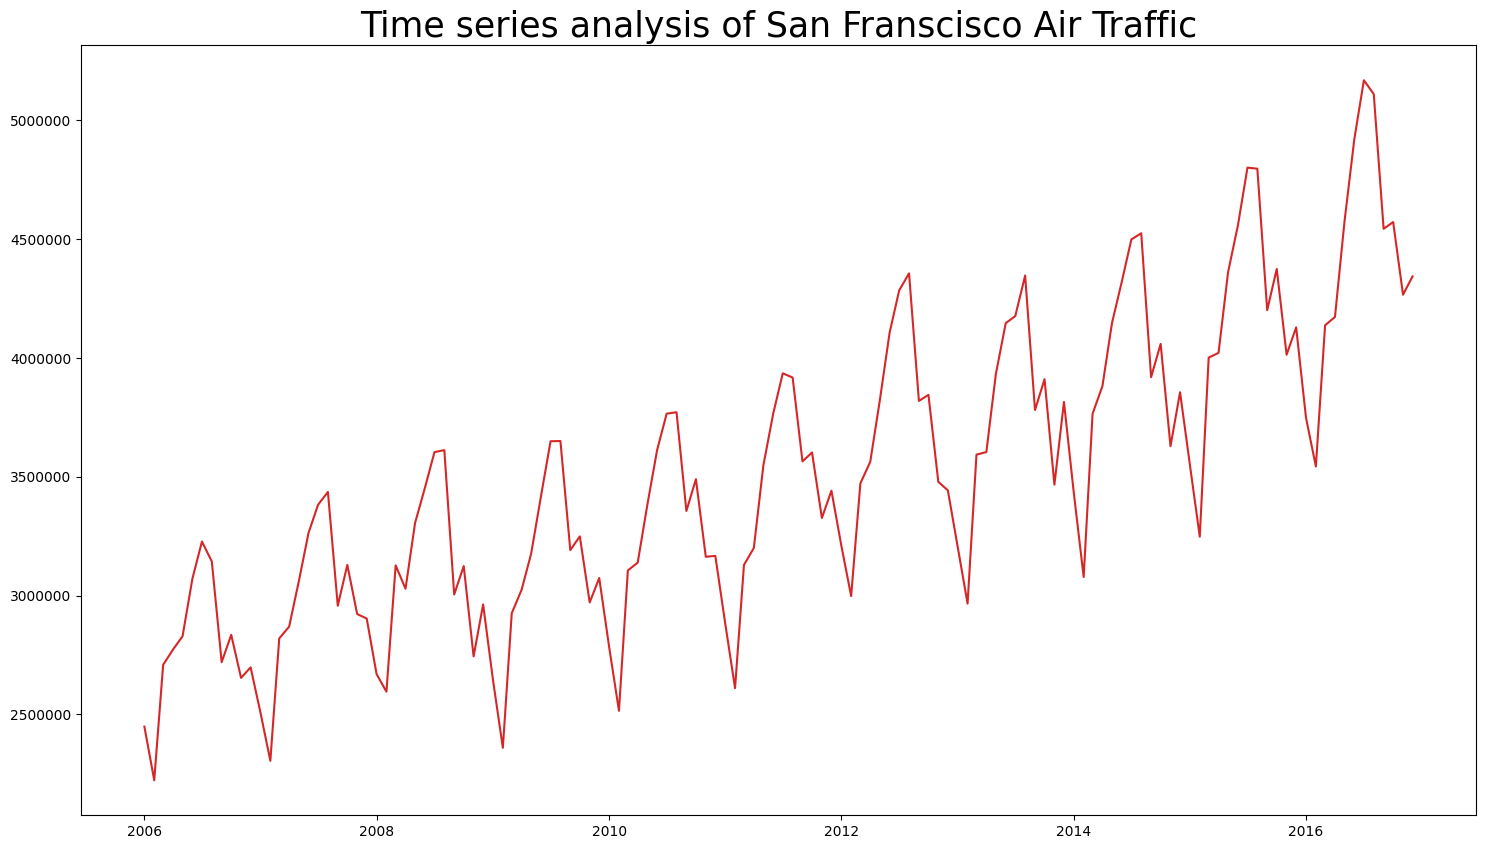

In [ ]:
#Plot time series using line plot
plt.figure(figsize= (18,10))

plt.plot(air_traffic_data['Date'], air_traffic_data['Total Passenger Count'], color='tab:red')
plt.title("Time series analysis of San Franscisco Air Traffic",fontsize = 25)
plt.ticklabel_format(style='plain', axis='y')

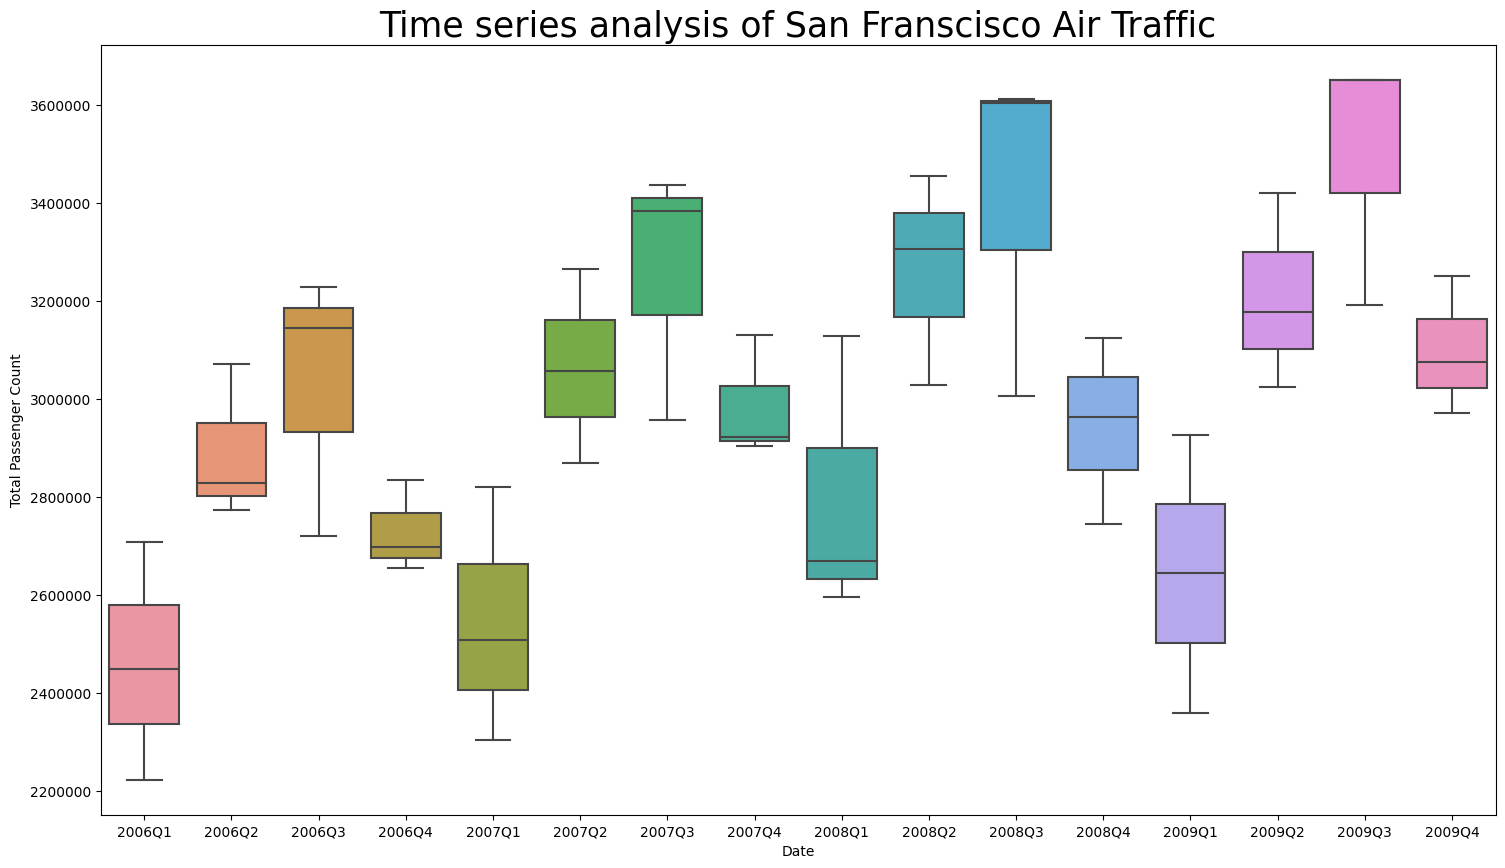

In [ ]:
#Plot time series using boxplot
plt.figure(figsize= (18,10))

data_subset = air_traffic_data[air_traffic_data['Date'] < '2010-01-01']

ax = sns.boxplot(data = data_subset , x= pd.PeriodIndex(data_subset['Date'], freq='Q'), #air_traffic_data['Date'].dt.month,
                 y= data_subset['Total Passenger Count'])

ax.set_title("Time series analysis of San Franscisco Air Traffic",fontsize = 25)

plt.ticklabel_format(style='plain', axis='y')

In [ ]:
#Load dataset
url = 'https://raw.githubusercontent.com/PacktPublishing/Exploratory-Data-Analysis-with-Python-Cookbook/main/Ch7/Data/SF_Air_Traffic_Passenger_Statistics_Transformed.csv'
air_traffic_data = pd.read_csv(url)
daily = 'https://raw.githubusercontent.com/PacktPublishing/Exploratory-Data-Analysis-with-Python-Cookbook/main/Ch7/Data/DailyDelhiClimate.csv'
weather_data = pd.read_csv(daily)

#Inspect first 5 rows and data types of the dataset
air_traffic_data.head(2)

,Date,Total Passenger Count
0,200601,2448889
1,200602,2223024


In [ ]:
weather_data.head(2)

,date,meantemp
0,01/01/2013,10.0
1,02/01/2013,7.4


In [ ]:
air_traffic_data.shape

(132, 2)

In [ ]:
weather_data.shape

(1461, 2)

In [ ]:
air_traffic_data.dtypes

Date                     int64
Total Passenger Count    int64
dtype: object

In [ ]:
weather_data.dtypes

date         object
meantemp    float64
dtype: object

In [ ]:
#Transform date column to date data type
air_traffic_data['Date']= pd.to_datetime(air_traffic_data['Date'], format = "%Y%m")
weather_data['date']= pd.to_datetime(weather_data['date'], format = "%d/%m/%Y")
air_traffic_data.dtypes

Date                     datetime64[ns]
Total Passenger Count             int64
dtype: object

In [ ]:
weather_data.dtypes

date        datetime64[ns]
meantemp           float64
dtype: object

In [ ]:
#Set date as index
air_traffic_data.set_index('Date',inplace = True)
weather_data.set_index('date', inplace = True)
air_traffic_data.shape

(132, 1)

In [ ]:
weather_data.shape

(1461, 1)

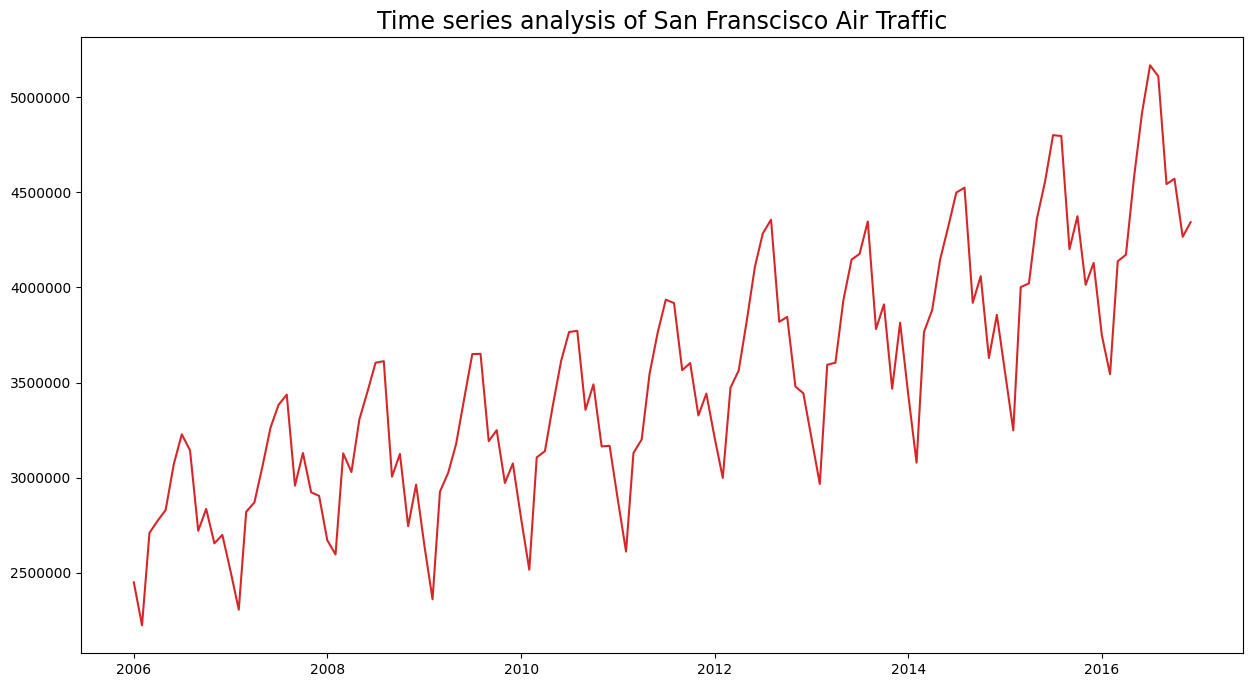

In [ ]:
#Plot time series using line plot
plt.figure(figsize= (15,8))

plt.plot(air_traffic_data.index, air_traffic_data['Total Passenger Count'], color='tab:red')
plt.title("Time series analysis of San Franscisco Air Traffic",fontsize = 17)
plt.ticklabel_format(style='plain', axis='y')

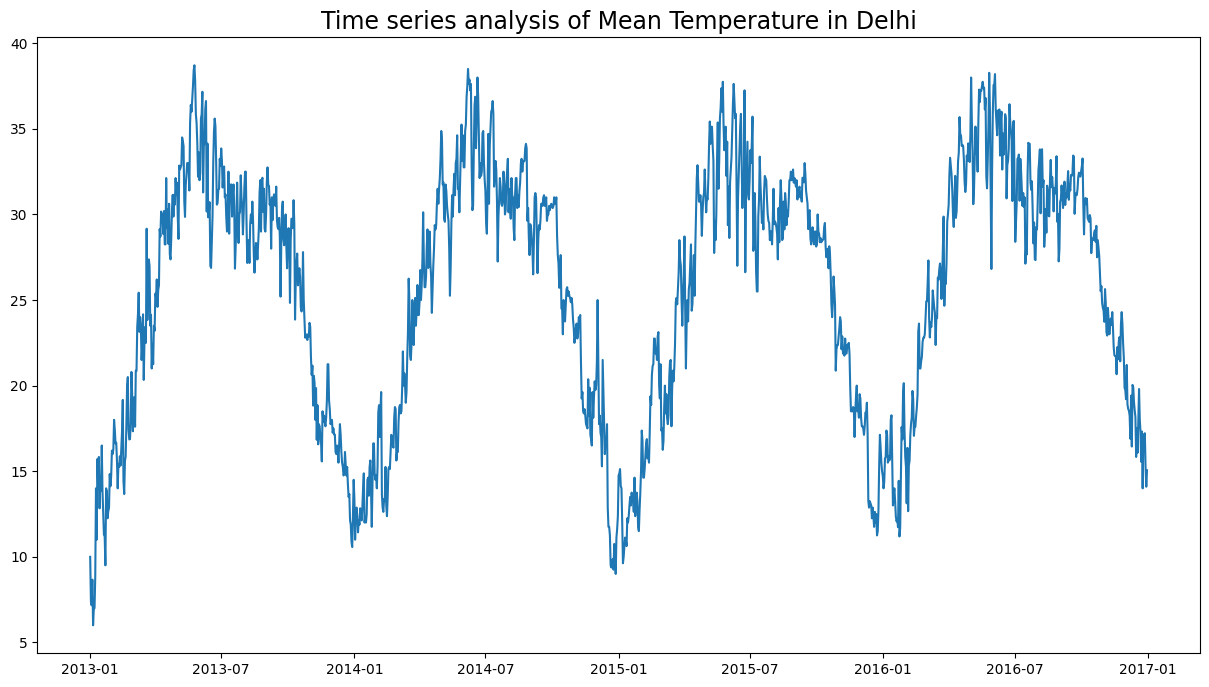

In [ ]:
plt.figure(figsize= (15,8))

plt.plot(weather_data.index, weather_data['meantemp'], color='tab:blue')
plt.title("Time series analysis of Mean Temperature in Delhi",fontsize = 17)
plt.ticklabel_format(style='plain', axis='y')

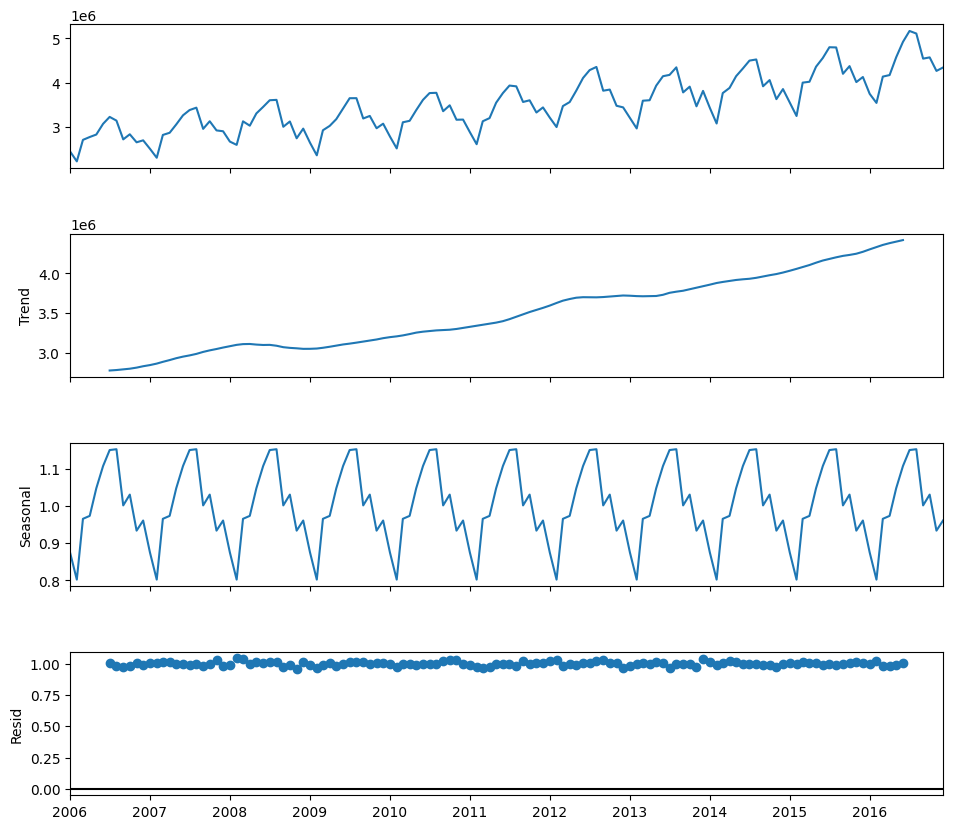

In [ ]:
#Decompose Timeseries using Multiplicative model
decomposition_multi = seasonal_decompose(air_traffic_data,
                                              model='multiplicative', period = 12)

fig = decomposition_multi.plot()
fig.set_size_inches((10, 9))
plt.show()

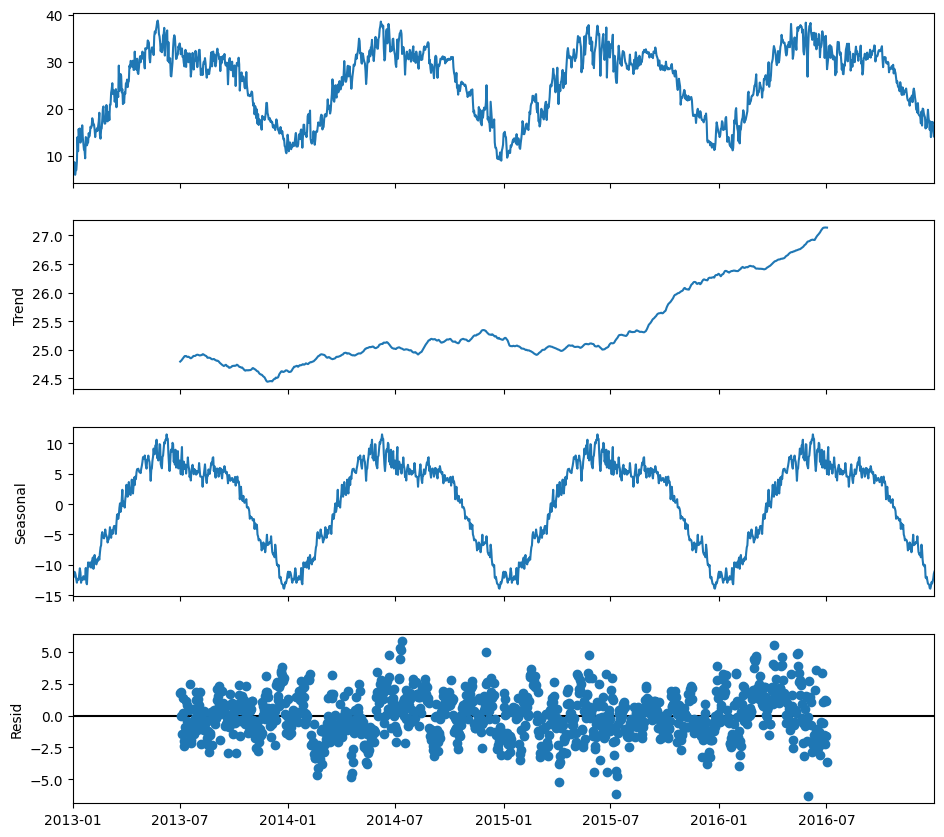

In [ ]:
#Decompose Timeseries using Additive model
decomposition_add = seasonal_decompose(weather_data,
                                              model='additive',period = 365)

fig = decomposition_add.plot()
fig.set_size_inches((10, 9))
plt.show()

In [4]:
#Load dataset
url = 'https://raw.githubusercontent.com/PacktPublishing/Exploratory-Data-Analysis-with-Python-Cookbook/main/Ch7/Data/MTNOY.csv'
stock_data = pd.read_csv(url)
stock_data = stock_data[['Date','Close']]

#Inspect first 5 rows and data types of the dataset
stock_data.head()

,Date,Close
0,2010-02-01,14.70
1,2010-02-02,14.79
2,2010-02-03,14.60
3,2010-02-04,14.10
4,2010-02-05,14.28


In [5]:
stock_data.shape

(1490, 2)

In [6]:
stock_data.dtypes

Date      object
Close    float64
dtype: object

In [7]:
#Transform date int to date
stock_data['Date']= pd.to_datetime(stock_data['Date'], format = "%Y-%m-%d")
stock_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [8]:
#Set date as index
stock_data.set_index('Date',inplace = True)
stock_data.shape

(1490, 1)

Text(0.5, 1.0, 'Time series analysis of MTN Group Limited Stocks')

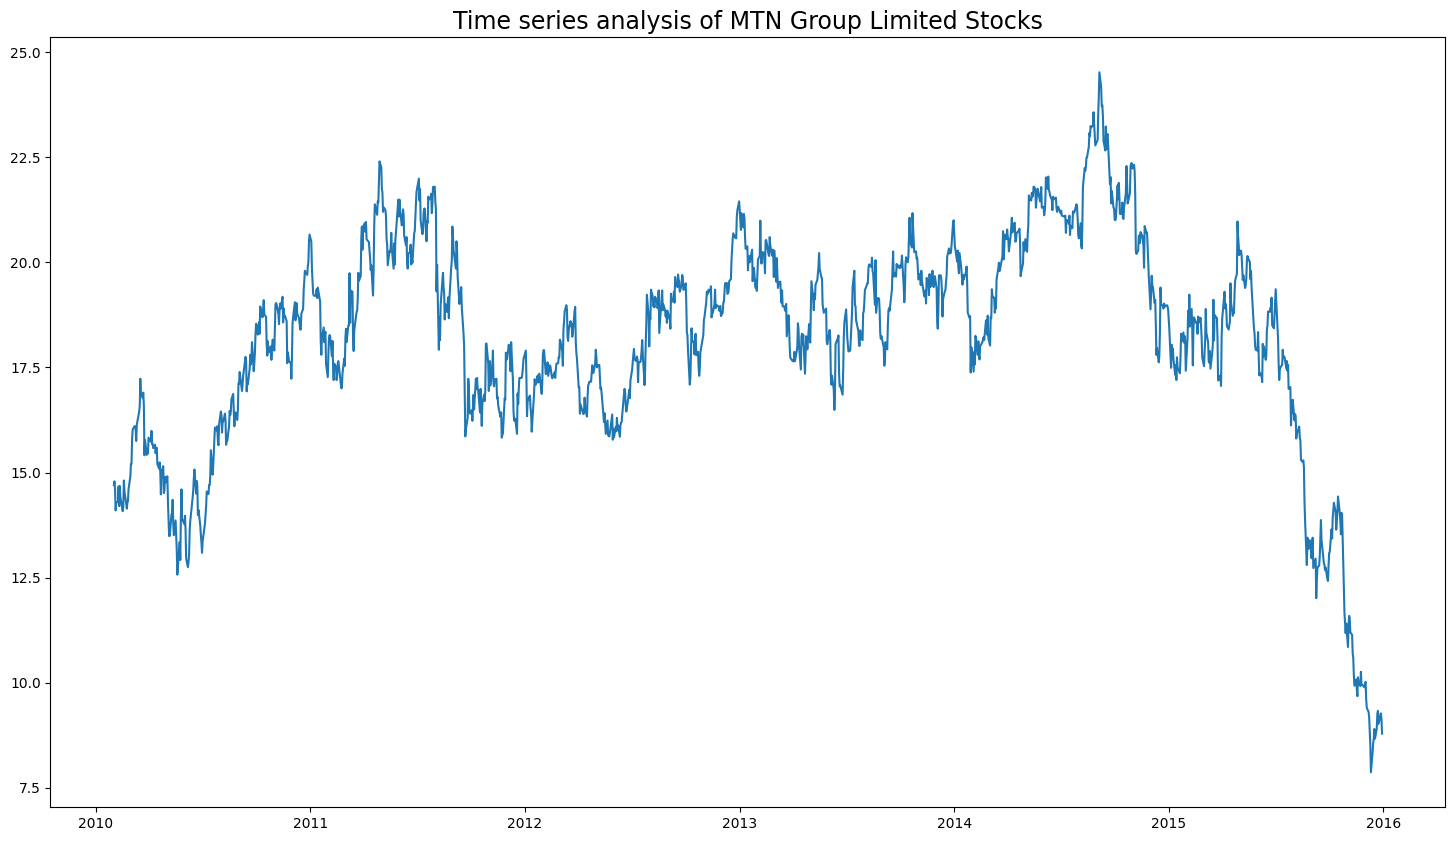

In [9]:
#Plot the stock data on a line plot
plt.figure(figsize= (18,10))

plt.plot(stock_data.index, stock_data['Close'],color='tab:blue')
plt.title("Time series analysis of MTN Group Limited Stocks",fontsize = 17)

In [10]:
#Perform Moving Average Smoothing
moving_data = stock_data.rolling(window=4)
moving_average_data = moving_data.mean()
moving_average_data.head()

,Close
Date,
2010-02-01,NaN
2010-02-02,NaN
2010-02-03,NaN
2010-02-04,14.5475
2010-02-05,14.4425


In [11]:
moving_average_data.head()

,Close
Date,
2010-02-01,NaN
2010-02-02,NaN
2010-02-03,NaN
2010-02-04,14.5475
2010-02-05,14.4425


Text(0.5, 1.0, 'Time series analysis of MTN Group Limited Stocks VS Moving Average')

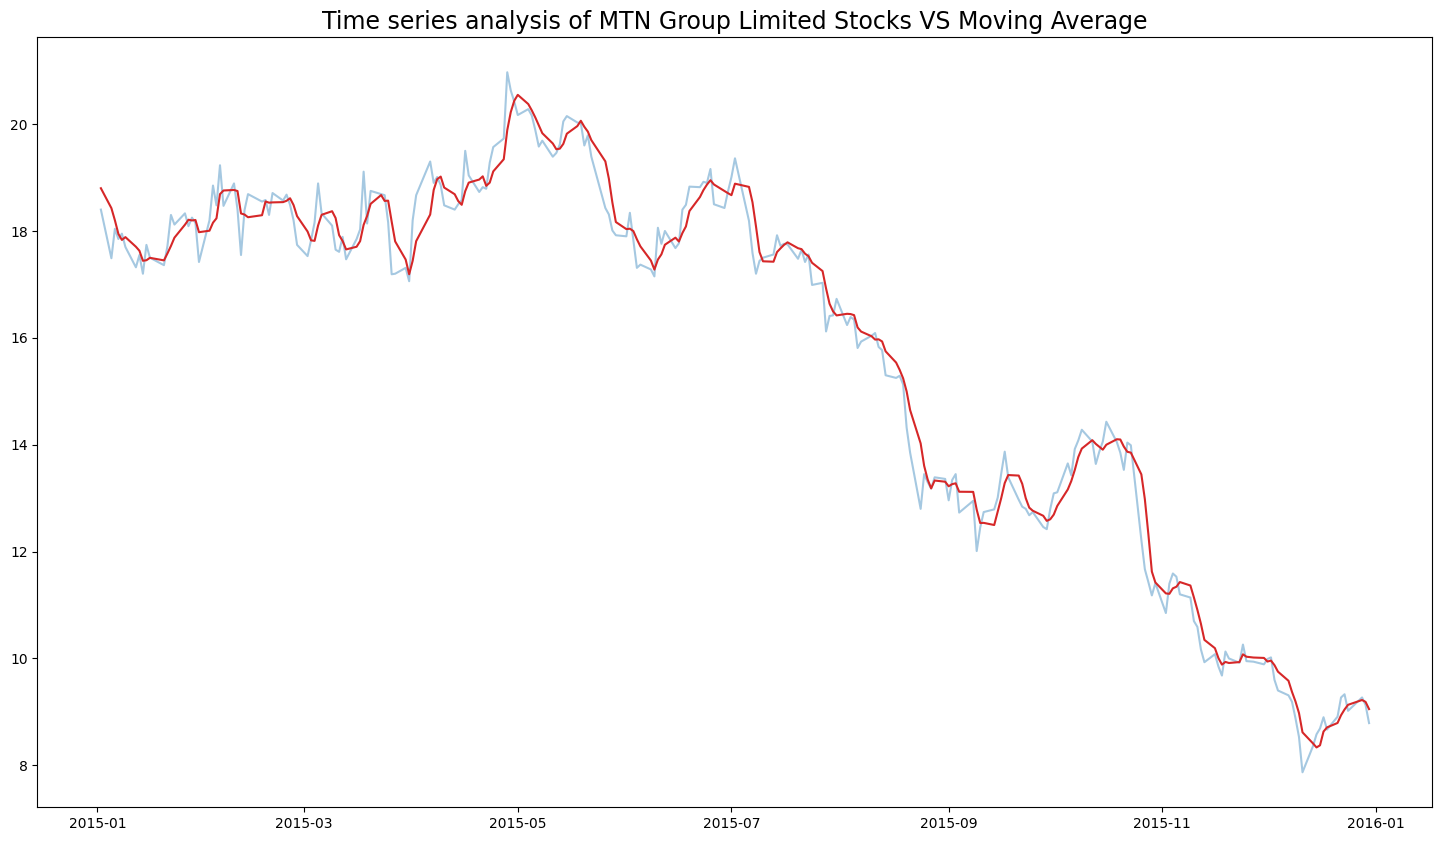

In [12]:
#Plot moving average against original time series using line plot
plt.figure(figsize= (18,10))

stock_data_subset = stock_data[stock_data.index>= '2015-01-01']
moving_average_data_subset = moving_average_data[moving_average_data.index>= '2015-01-01']


plt.plot(stock_data_subset.index, stock_data_subset['Close'],color='tab:blue',alpha = 0.4)
plt.plot(moving_average_data_subset.index,moving_average_data_subset['Close'],color='tab:red')
plt.title("Time series analysis of MTN Group Limited Stocks VS Moving Average",fontsize = 17)

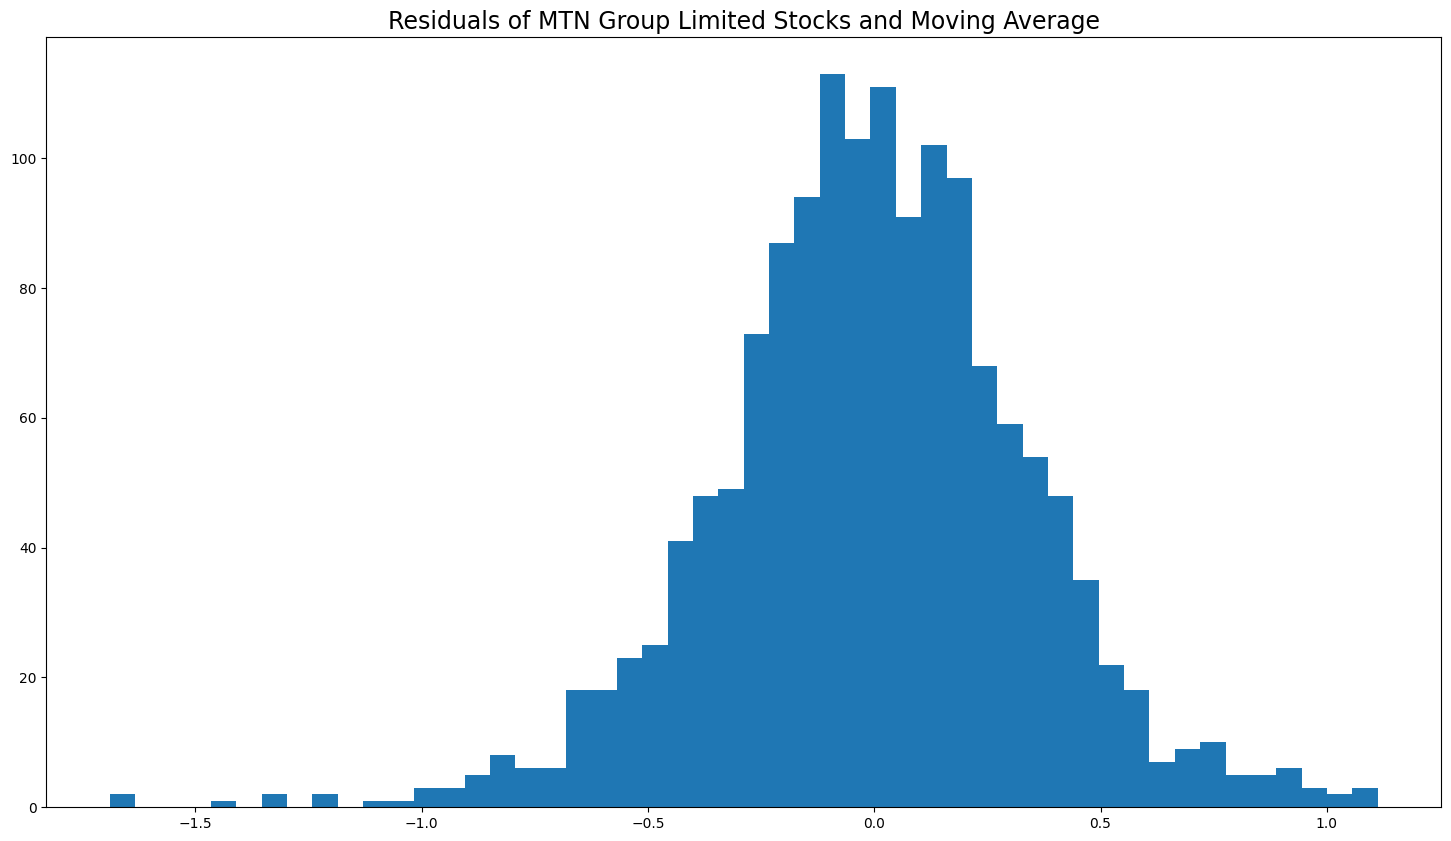

In [13]:
#Plot the residuals
plt.figure(figsize= (18,10))

residuals = stock_data - moving_average_data
plt.hist(residuals, bins=50)
plt.title("Residuals of MTN Group Limited Stocks and Moving Average",fontsize = 17)
plt.show()

In [14]:
#Identify residuals greater than 90th percentile and review
percentile_90 = np.nanpercentile(abs(residuals['Close']),90)
residuals[abs(residuals['Close']) >= percentile_90]

,Close
Date,
2010-03-18,0.5750
2010-03-25,-1.0125
2010-05-05,-0.5700
2010-05-06,-0.6625
2010-05-20,-0.6975
...,...
2015-09-17,0.5875
2015-10-26,-1.2250
2015-10-27,-1.3100


In [17]:
#Perform Exponential Smoothing
exponentialmodel = ExponentialSmoothing(stock_data)
fit = exponentialmodel.fit(smoothing_level=0.7)
fitted_values = fit.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Time series analysis of MTN Group Limited Stocks VS Exponential Smoothing Data')

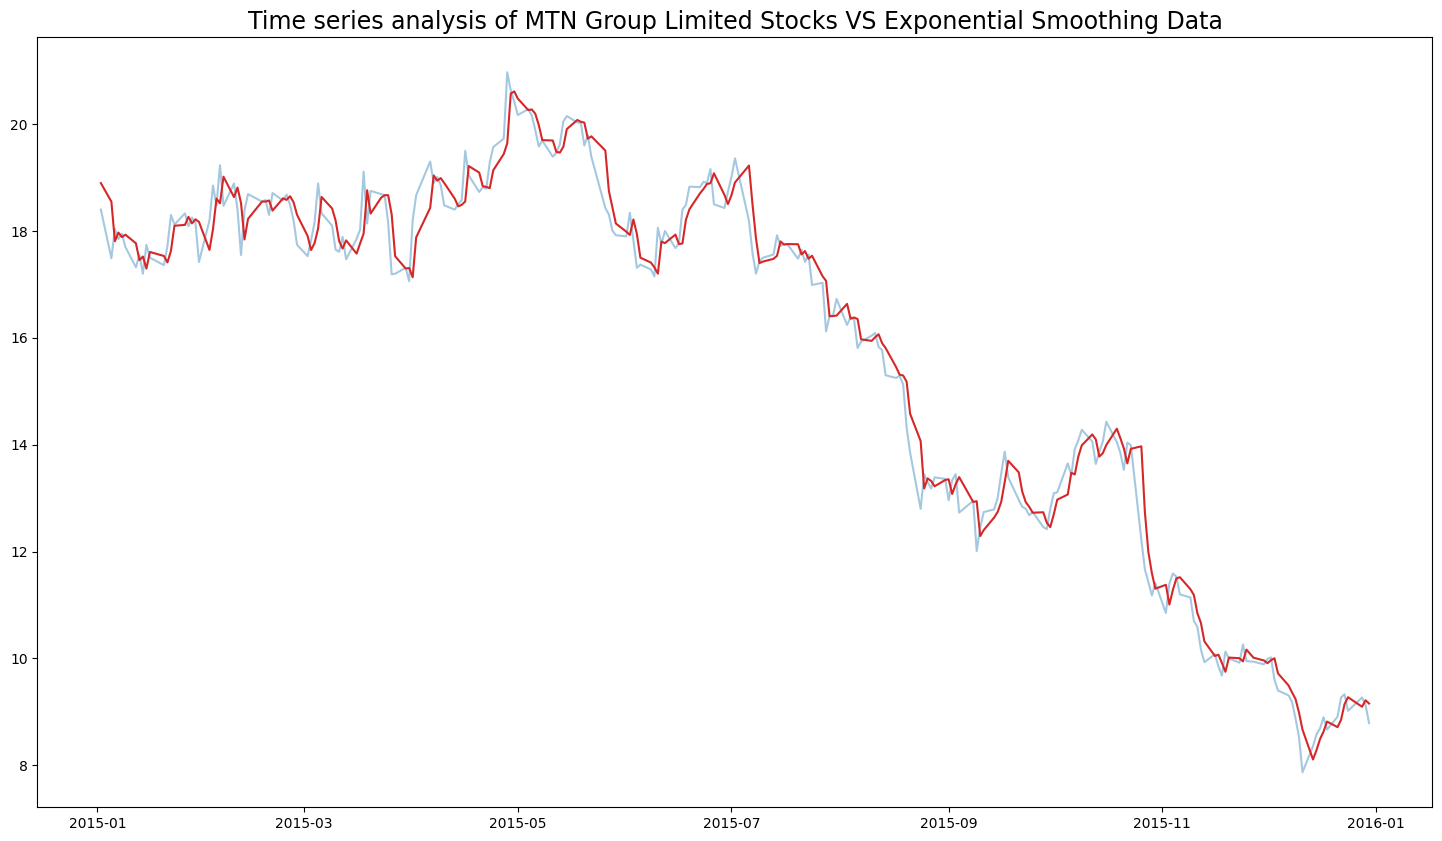

In [18]:
#Plot time series using line plot
plt.figure(figsize= (18,10))

stock_data_subset = stock_data[stock_data.index>= '2015-01-01']
fitted_values_subset = fitted_values[fitted_values.index>= '2015-01-01']


plt.plot(stock_data_subset.index, stock_data_subset['Close'],label='Original Data',color='tab:blue',alpha = 0.4)
plt.plot(fitted_values_subset.index,fitted_values_subset.values,label='Exponential Smoothing',color='tab:red')
plt.title("Time series analysis of MTN Group Limited Stocks VS Exponential Smoothing Data",fontsize = 17)

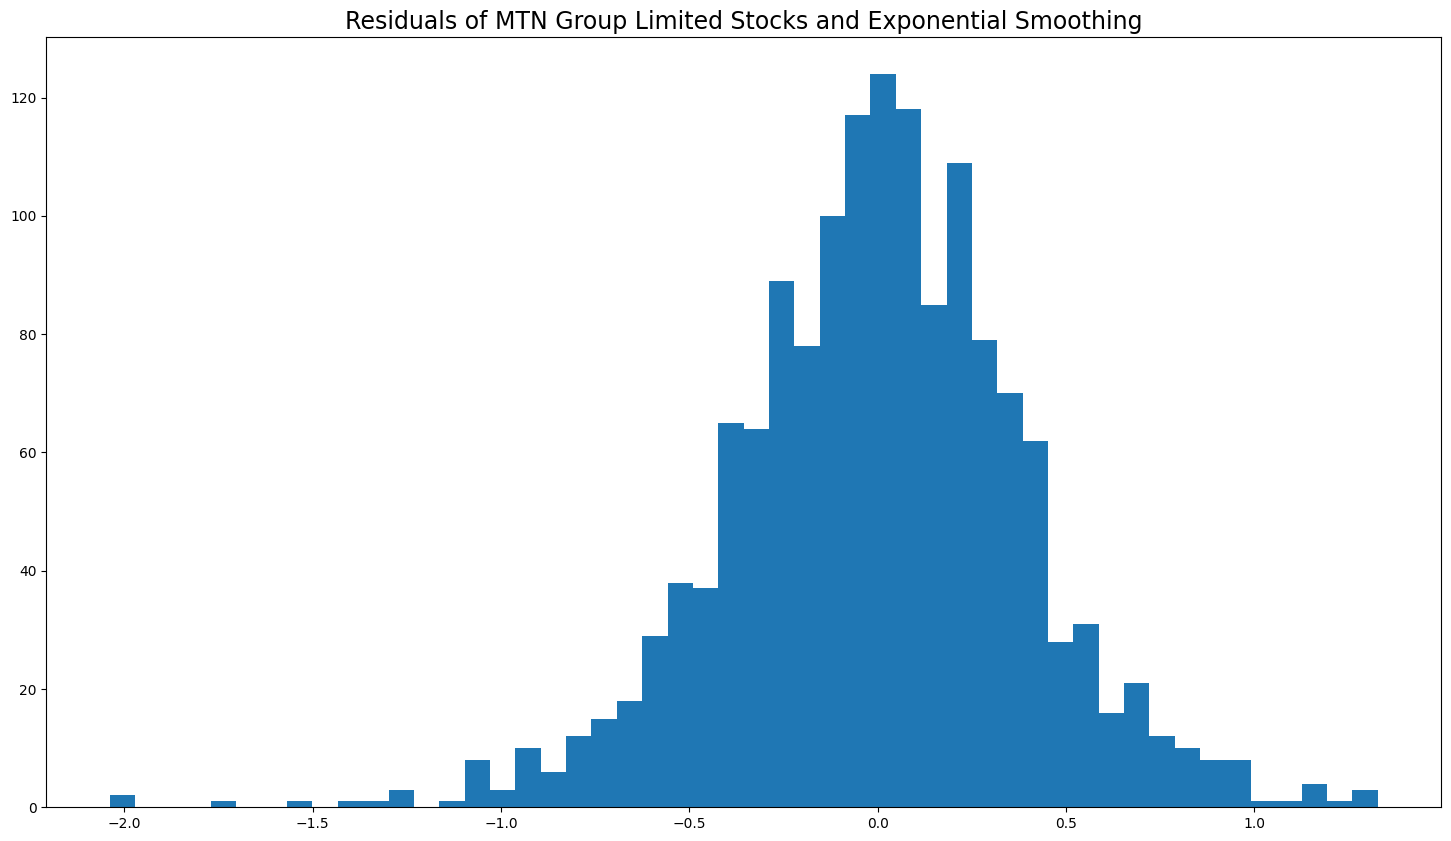

In [19]:
#Plot the residuals
plt.figure(figsize= (18,10))

residuals = stock_data.squeeze() - fitted_values
plt.hist(residuals, bins=50)
plt.title("Residuals of MTN Group Limited Stocks and Exponential Smoothing",fontsize = 17)
plt.show()

In [20]:
#Identify residuals greater than 90th percentile and review
percentile_90 = np.nanpercentile(abs(residuals),90)
residuals[abs(residuals) >= percentile_90]

Date
2010-03-18    0.706917
2010-03-25   -1.272450
2010-05-20   -0.714171
2010-05-26    0.942185
2010-05-27    0.942656
                ...   
2015-09-04   -0.663435
2015-09-09   -0.933709
2015-10-26   -1.749966
2015-10-27   -1.074990
2015-12-11   -0.797649
Length: 149, dtype: float64